# Chapter12 의사결정트리

## 01 의사결정트리의 이해

### 의사결정트리의 개념
#### 의사결정트리(decision tree): 어떤 규칙을 하나의 트리(tree)형태로 표현한 후 이를 바탕으로 분류나 회귀 문제를 해결하는 것이다.
- 규칙은 if-else 문으로 표현이 가능
- 트리는 일종의 경로를 표현하는 것
- 트리 구조의 마지막 노드에는 분류 문제에서 클래스, 회귀 문제에서는 예측치가 들어감


- 딥러닝 기반을 제외한 전통적인 통계 기반의 머신러닝 모델 중 그 효과와 실용성이 가장 좋은 모델 중 하나
    - 테이블형 데이터에 있어 설명력과 성능의 측면에서 딥러닝 모델들과 대등하게 경쟁
    - 앙상블(ensemble)모델이나 부스팅(boosting) 같은 새로운 기법들이 모델들의 성능을 대폭 향상시키고 있다.

#### 엔트로피(entropy): 어떤 목적 달성을 위한 경우의 수를 정량적으로 표현하는 수치
- 낮은 엔트로피 = 경우의 수가 적다 = 낮은 불확실성
- 높은 엔트로피 = 경우의 수가 많다 = 높은 불확실성

## 04 의사결정트리 알고리즘의 다양한 변형

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd_data=pd.read_csv('c:/users/user/ch12/vegeterianl_dataset.csv',delimiter=r'\s+')
pd_data.drop('ID',axis=1)

,STREAM,SLOPE,ELEVATION,VEGETATION
0,False,steep,3900,chapparal
1,True,moderate,300,riparian
2,True,steep,1500,riparian
3,False,steep,1200,chapparal
4,False,flat,4450,conifer
5,True,steep,5000,conifer
6,True,steep,3000,chapparal


ELEVATION 속성의 데이터를 정렬시킨다

VEGETATION이 300,1200,1500,3900에서 각각 y 데이터의 라벨이 달라졌음을 알 수 있다.

In [3]:
pd_data.sort_values('ELEVATION')

,ID,STREAM,SLOPE,ELEVATION,VEGETATION
1,2,True,moderate,300,riparian
3,4,False,steep,1200,chapparal
2,3,True,steep,1500,riparian
6,7,True,steep,3000,chapparal
0,1,False,steep,3900,chapparal
4,5,False,flat,4450,conifer
5,6,True,steep,5000,conifer


## 05 의사결정트리의 구현

In [4]:
pd_data=pd.read_csv('http://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data=pd_data.drop('RID',axis=1)

In [5]:
def get_info(df):
    buy=df.loc[df['class_buys_computer']=='yes']
    not_buy=df.loc[df['class_buys_computer']=='no']
    x=np.array([len(buy)/len(df),len(not_buy)/len(df)])
    y=np.log2(x[x!=0])
    
    info_all= -sum(x[x!=0]*y)
    return info_all

In [6]:
get_info(pd_data)

0.9402859586706311

In [7]:
youth=pd_data.loc[pd_data['age']=='youth']
senior=pd_data.loc[pd_data['age']=='senior']
middle_aged=pd_data.loc[pd_data['age']=='middle_aged']

In [8]:
print(get_info(youth))

0.9709505944546686


In [9]:
print(get_info(senior))

0.9709505944546686


In [10]:
print(get_info(middle_aged))

-0.0


In [11]:
def get_attribute_info(df,attribute_name):
    attribute_values=pd_data[attribute_name].unique()
    get_infos=[]
    for value in attribute_values:
        split_df=pd_data.loc[pd_data[attribute_name]==value]
        
        get_infos.append((len(split_df)/len(df))*get_info(split_df))
        
    return sum(get_infos)

In [12]:
get_attribute_info(pd_data,"age")

0.6935361388961918

In [13]:
# 전체 대비 각 속성별 정보 이득

In [14]:
get_info(pd_data)-get_attribute_info(pd_data,'age')

0.24674981977443933

In [15]:
get_info(pd_data)-get_attribute_info(pd_data,'income')

0.02922256565895487

In [16]:
get_info(pd_data)-get_attribute_info(pd_data,'student')

0.15183550136234159

In [17]:
get_info(pd_data)-get_attribute_info(pd_data,'credit_rating')

0.04812703040826949

In [18]:
# age의 정보 이득이 가장 크므로 해당 값을 기준으로 의사결정트리의 가지(branch)를 생성한다.

In [19]:
youth=pd_data.loc[pd_data['age']=='youth']
get_info(youth)-get_attribute_info(youth,'income')

-1.580026905978025

In [20]:
get_info(youth)-get_attribute_info(youth,'student')

-1.2367106860085422

In [21]:
get_info(youth)-get_attribute_info(youth,'credit_rating')

-1.527094404679944

##### 타이타닉 데이터

train_df와 test_df를 통합하여 all_df에 저장

In [22]:
import pandas as pd

train_df=pd.read_csv('c:/users/user/ch12/train.csv')
test_df=pd.read_csv('c:/users/user/ch12/test.csv')

train_id=train_df['PassengerId'].values
test_id=test_df['PassengerId'].values

all_df=train_df.append(test_df).set_index('PassengerId') # PassengerId를 index로 사용

C:\Users\user\AppData\Local\Temp\ipykernel_11608\1531828946.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df=train_df.append(test_df).set_index('PassengerId') # PassengerId를 index로 사용


In [23]:
all_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


Sex가 male이면 0으로, female이면 1로 바꾸고

Pclass와 Age로 그룹핑 한 Age의 평균값으로 Age의 결측치를 채운다.

In [24]:
all_df['Sex']=all_df['Sex'].replace({'male':0,'female':1})

all_df['Age'].fillna(all_df.groupby('Pclass')['Age'].transform('mean'),inplace=True)

Cabin에 존재하는 값이 문자열이면 split으로 나눠서 개수를 cabin_count에 표시

In [25]:
all_df['cabin_count']=all_df['Cabin'].map(
    lambda x:len(x.split()) if type(x)==str else 0)

이름을 기준으로 사회적 지위 정보를 social_status열에 저장

In [26]:
def transform_status(x):
    if 'Mrs' in x or 'Ms' in x:
        return 'Mrs'
    elif 'Mr' in x:
        return 'Mr'
    elif 'Miss' in x:
        return 'Miss'
    elif 'Master' in x:
        return 'Master'
    elif 'Dr' in x:
        return 'Dr'
    elif 'Rev' in x:
        return 'Rev'
    elif 'Col' in x:
        return 'Col'
    else:
        return '0'
    
all_df['social_status']=all_df['Name'].map(lambda x:transform_status(x))

In [27]:
all_df['social_status'].value_counts()

Mr        758
Miss      258
Mrs       203
Master     61
0           9
Rev         8
Dr          8
Col         4
Name: social_status, dtype: int64

Embarked열의 결측치 확인

In [28]:
all_df[all_df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,1,Miss
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,1,Mrs


all_df에서 결측치인 62행과 830행 제거

train_id에서도 62번과 830번 제거(index는 0부터 시작이므로 61번, 829번을 삭제)

In [29]:
all_df=all_df.drop([62,830])
train_id=np.delete(train_id, [62-1,830-1])

Fare열의 결측치 찾기

In [30]:
all_df[all_df['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,0,Mr


Pclass와 Sex로 그룹핑 후 Fare의 평균값 계산

In [31]:
all_df.groupby(['Pclass','Sex'])['Fare'].mean()

Pclass  Sex
1       0       69.888385
        1      109.826644
2       0       19.904946
        1       23.234827
3       0       12.415462
        1       15.324250
Name: Fare, dtype: float64

Fare의 결측치가 Pclass=3, Sex=0이므로 <- 이 그룹의 평균값인 12.415462로 결측치를 채운다.

In [32]:
all_df.loc[all_df['Fare'].isnull(),'Fare']=12.415462

cabin이 문자열형태이면 첫번째 글자를 cabin_type에, 그렇지 않으면 99로 채운다

In [33]:
all_df['cabin_type']=all_df['Cabin'].map(lambda x:x[0] if type(x)==str else '99')

필요 없는 Cabin, Name, Ticket열 삭제

In [34]:
del all_df['Cabin']
del all_df['Name']
del all_df['Ticket']

Y값인 Survived의 값을 y에 저장하고, all_df에서 Survived열 삭제

In [35]:
y=all_df.loc[train_id,'Survived'].values
del all_df['Survived']

all_df를 원핫인코딩을 진행하고, 그 값을 X에 저장

In [36]:
X_df=pd.get_dummies(all_df)
X=X_df.values

MinMaxScaler를 사용하여 전체 데이터의 스케일을 0-1사이로 변경

In [37]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()

minmax_scaler.fit(X)
X=minmax_scaler.transform(X)

- train_id 개수만큼 X_train에
- 나머지는 X_test에

In [38]:
X_train=X[:len(train_id)]
X_test=X[len(train_id):]

##### 의사결정트리 구현 및 정확도 그래프 그리기
- min_samples_leaf: 마지막 노드의 최소 데이터의 개수

- min_samples_leaf의 개수를 조정하여 가치치기 실시
- cross_val_score를 사용하여 5번의 crossvalidation 프로세스를 거쳐 test데이터셋의 5번의 평균 정확성 계산

<AxesSubplot:>

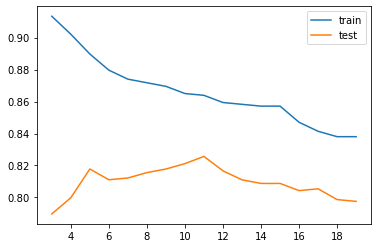

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
test_accuracy = [] # 예측정확도
train_accuracy = [] # 훈련정확도
for idx in range(3, 20):
    df=DecisionTreeClassifier(min_samples_leaf=idx) # 의사결정트리 객체
    acc=cross_val_score(df,X_train, y, scoring="accuracy", cv=5).mean()
    train_accuracy.append(accuracy_score(df.fit(X_train,y).predict(X_train),y))
    test_accuracy.append(acc)

result = pd.DataFrame(train_accuracy,index=range(3,20),columns=["train"]) # train정확도
result["test"] = test_accuracy # test정확도
result.plot() # 그래프로 나타내기

test 데이터셋의 정확성은 11에서 가장 높았다가 계속 떨어지는 것을 확인할 수 있다.

의사결정트리의 경우 마지막 노트의 데이터 개수가 적으면 적을수록 과대적합이 발생한다.

##### Pipeline을 사용하여 두 개 이상의 알고리즘과 다양한 하이퍼 매개변수 실험을 수행하는 코드
- algorithmes: 사용할 알고리즘 정의
- params: 사용할 하이퍼 매개변수 정의

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

algorithmes = [LogisticRegression(), DecisionTreeClassifier()]

c_params = [0.1,  5.0, 7.0, 10.0, 15.0, 20.0, 100.0]


params = []
params.append([{
    "solver" : ["saga"],
    "penalty" : ["l1"],
    "C" : c_params
    },{
    "solver" : ['liblinear'],
    "penalty" : ["l2"],
    "C" : c_params
    }
    ])
params.append({
    "criterion" : ["gini", "entropy"],
    "max_depth" : [10,8,7,6,5,4,3,2],
    "min_samples_leaf": [1,2,3,4,5,6,7,8,9]})

GridSearchCV를 사용하여 로지스틱 회귀와 의사결정트리 알고리즘을 학습할 수 있도록 코드 작성

결과를 estimator_results에 저장

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

scoring = ['accuracy']
estimator_results = []
for i, (estimator, params) in enumerate(zip(algorithmes,params)):
    gs_estimator = GridSearchCV(
            refit="accuracy", estimator=estimator,param_grid=params, 
            scoring=scoring, cv=5, verbose=1, n_jobs=4) # 모델 생성

    gs_estimator.fit(X_train, y) # 훈련
    estimator_results.append(gs_estimator) # 결과 저장

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [42]:
estimator_results[0].best_score_ # [0]: LogisticRegression

0.8268075922046594

In [43]:
estimator_results[1].best_score_ # [1]: DecisionTreeClassifier

0.8346918047356059

##### 모델 정보와 하이퍼 매개변수를 한 번에 정리하기 위한 코드

In [44]:
import pandas as pd
from pandas import DataFrame
from collections import defaultdict

result_df_dict = {}

result_attributes = ["model", "accuracy", "penalty", "solver", "C", "criterion", "max_depth", "min_samples_leaf"]
result_dict = defaultdict(list)

algorithm_name= ["LogisticRegression", "DecisionTreeClassifier"]

for i, estimators in enumerate(estimator_results):
    number_of_estimators = len(estimators.cv_results_["mean_fit_time"])

    for idx_estimator in range(number_of_estimators):
        result_dict["model"].append(algorithm_name[i])
        result_dict["accuracy"].append(
            estimators.cv_results_["mean_test_accuracy"][idx_estimator])
            
    for param_value in estimators.cv_results_["params"]:
        for k,v in param_value.items():
            result_dict[k].append(v)
    for attr_name in result_attributes:
        if len(result_dict[attr_name]) < len(result_dict["accuracy"]):
            result_dict[attr_name].extend([None for i in range(number_of_estimators)])

In [45]:
result_df = DataFrame(result_dict, columns=result_attributes)
result_df.sort_values("accuracy",ascending=False).head(n=10)

,model,accuracy,penalty,solver,C,criterion,max_depth,min_samples_leaf
135,DecisionTreeClassifier,0.834692,None,None,NaN,entropy,4.0,5.0
136,DecisionTreeClassifier,0.834692,None,None,NaN,entropy,4.0,6.0
139,DecisionTreeClassifier,0.834679,None,None,NaN,entropy,4.0,9.0
137,DecisionTreeClassifier,0.833556,None,None,NaN,entropy,4.0,7.0
138,DecisionTreeClassifier,0.833556,None,None,NaN,entropy,4.0,8.0
102,DecisionTreeClassifier,0.833543,None,None,NaN,entropy,8.0,8.0
133,DecisionTreeClassifier,0.832445,None,None,NaN,entropy,4.0,3.0
132,DecisionTreeClassifier,0.832445,None,None,NaN,entropy,4.0,2.0
131,DecisionTreeClassifier,0.831321,None,None,NaN,entropy,4.0,1.0
66,DecisionTreeClassifier,0.830172,None,None,NaN,gini,4.0,8.0


- feature_importances_: 중요한 변수가 무엇인지 확인

In [46]:
estimator_results[1].best_estimator_.feature_importances_ # 의사결정트리 중요도

array([0.13273669, 0.06209254, 0.09444317, 0.        , 0.        ,
       0.18738059, 0.01339862, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.5099484 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [47]:
X_df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'cabin_count',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'social_status_0',
       'social_status_Col', 'social_status_Dr', 'social_status_Master',
       'social_status_Miss', 'social_status_Mr', 'social_status_Mrs',
       'social_status_Rev', 'cabin_type_99', 'cabin_type_A', 'cabin_type_B',
       'cabin_type_C', 'cabin_type_D', 'cabin_type_E', 'cabin_type_F',
       'cabin_type_G', 'cabin_type_T'],
      dtype='object')

In [48]:
coef = estimator_results[1].best_estimator_.feature_importances_
coef.argsort()[::-1] # 넘파이배열 정렬, 뒤에서부터

array([15,  5,  0,  2,  1,  6, 12,  3,  4,  7,  8,  9, 10, 11, 26, 25, 14,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 13], dtype=int64)

In [49]:
X_df.columns[coef.argsort()[::-1]][:5] # 앞에서부터 5개의 속성 출력

Index(['social_status_Mr', 'Fare', 'Pclass', 'Age', 'Sex'], dtype='object')

##### 의사결정트리 시각화

In [50]:
!pip install pydotplus

In [51]:
import os
os.environ['PATH']+=os.pathsep + 'c:\Program Files\Graphviz/bin/'

titanic.png 파일에 의사결정트리 이미지 저장 및 화면에 출력

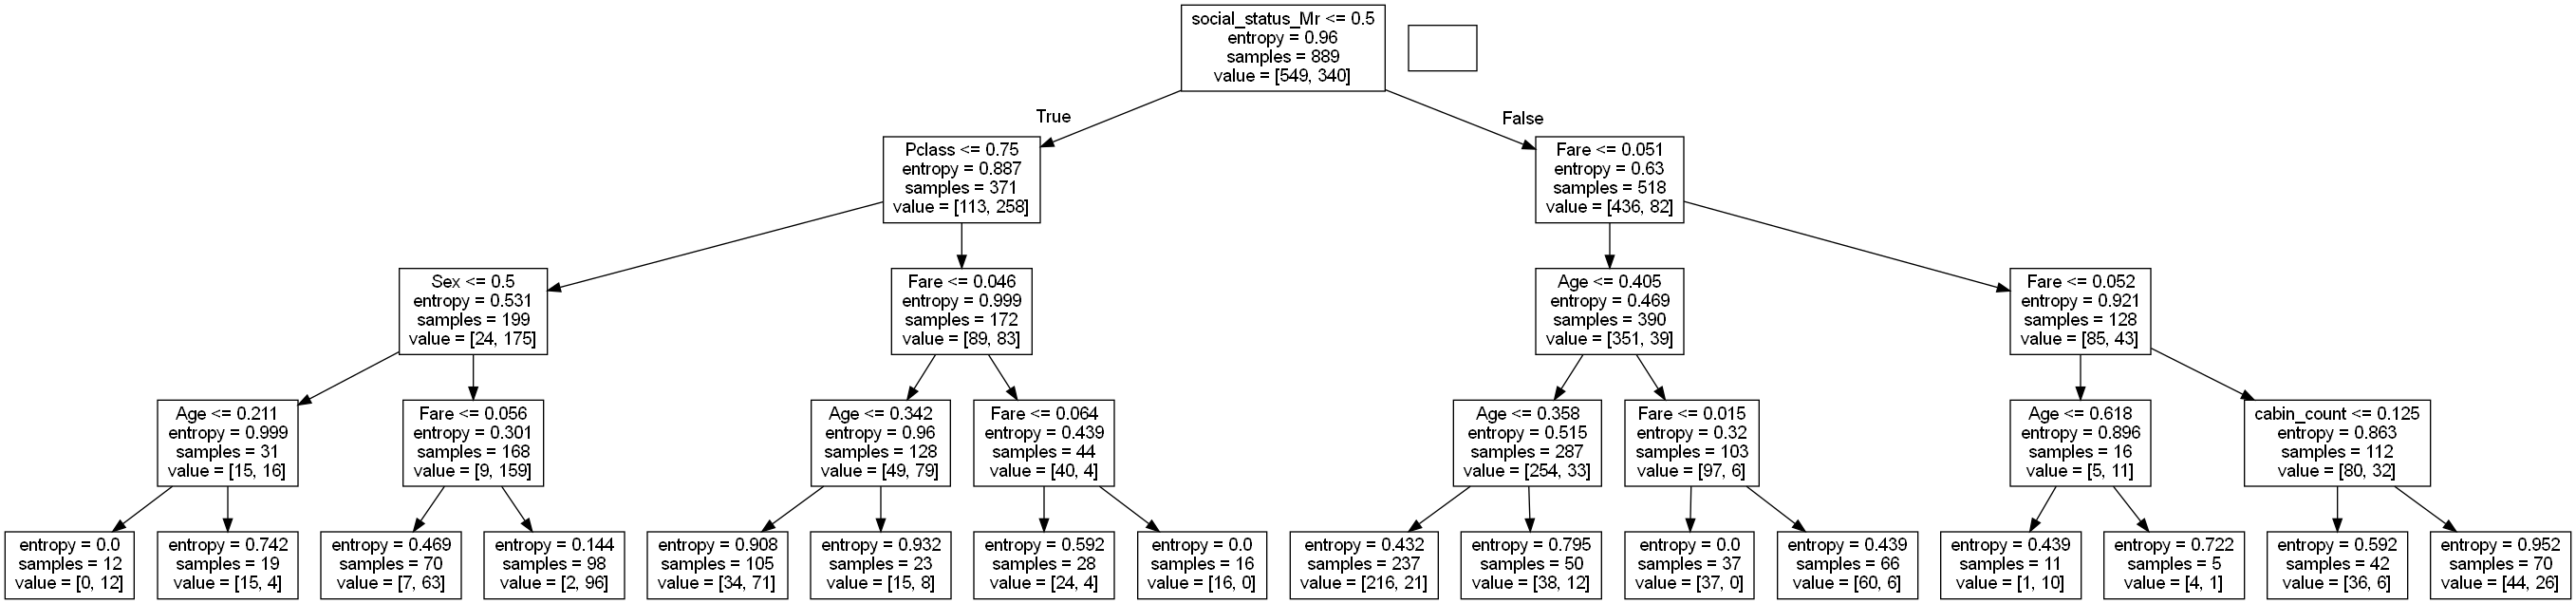

In [52]:
import pydotplus
from six import StringIO
from sklearn import tree

best_tree=estimator_results[1].best_estimator_
column_names=X_df.columns

dot_data=StringIO()
tree.export_graphviz(best_tree,out_file=dot_data,feature_names=column_names)

graph=pydotplus.pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic.png')

from IPython.core.display import Image
Image(filename='titanic.png')